# 第7章 分類２：客船沈没事故での生存予測

顧客が金融商品を購入するかどうかを予測するモデルを構築しましょう。  
金融商品を購入するかどうかはy列が示しています。  

y列…yes:購入した、no:購入しなかった

読み込むCSVファイル「bank2.csv」

**問1**  
下記セルのコメントに従って、必要なライブラリ、モジュールメソッドのインポートをしてください。

In [ ]:
# pandasをインポートし、別名 pd とする
import pandas as pd

# treeモジュールのインポート
from sklearn import tree

# train_test_splitメソッドのインポート
from sklearn.model_selection import train_test_split

# matplotlibの図をセルに表示できるように設定する
%matplotlib inline

**問2**  
「bank2.csv」を読み込み、先頭の5行を表示してください。

In [ ]:
# csv読み込み
df = pd.read_csv("bank2.csv")

# 先頭の5行を表示
df.head()

,age,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,cellular,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39.0,telephone,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25.0,telephone,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38.0,telephone,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47.0,cellular,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


▶実行結果  
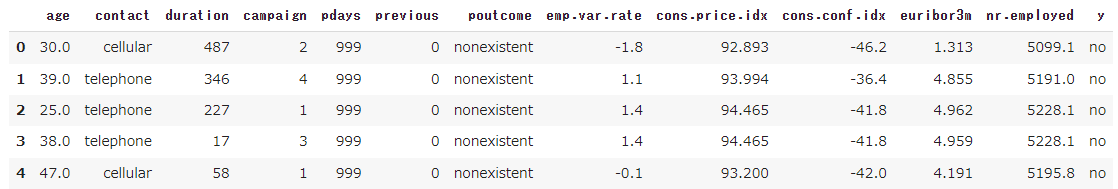

**問3**  
正解データのデータの偏りを確認します。種類ごとの出現回数を表示してください。

In [ ]:
# 正解データの類別と個数の表示
vc = df['y'].value_counts()
print(vc)

no     3668
yes     451
Name: y, dtype: int64


### ▶実行結果

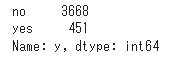

**問4**  
各列の欠損値の個数を表示してください。  

In [ ]:
df.isnull().sum()

age               2
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

▶実行結果  
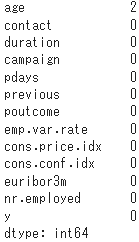

**問5**  
poutcome列を基準に、age列の平均値を表示してください

In [ ]:
df.groupby('poutcome').mean()['age']

poutcome
failure        40.399558
nonexistent    39.981266
success        42.468085
Name: age, dtype: float64

▶実行結果  
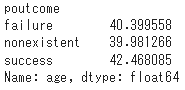

**問6**  
poutcome列とcontact列でクロス集計して、age列の平均値を表示してください。  
縦軸はpoutcome列、横軸はcontact列とする。

In [ ]:
pd.pivot_table(df, index = 'poutcome', columns = 'contact', values = 'age')

contact,cellular,telephone
poutcome,,
failure,40.338028,41.370370
nonexistent,39.817096,40.221833
success,42.145038,46.700000


▶実行結果  
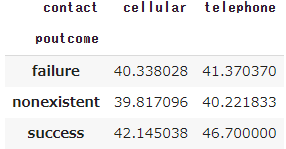

**問7**  
欠損値のある行のみを表示してください

In [ ]:
series_nan_any = df[df.isnull().any(axis=1)]
series_nan_any

,age,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
213,NaN,cellular,88,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no
1609,NaN,telephone,1628,2,6,1,success,-3.4,92.649,-30.1,0.719,5017.5,yes


▶実行結果  
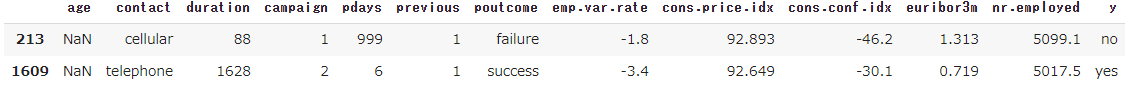

**問8**  
欠損値のある行のage列、poutcome列、contact列のみを表示してください

In [ ]:
# df[df.isnull().any(axis=1)][['age', 'poutcome', 'contact']]
series_nan_any.loc[:, ['age', 'poutcome', 'contact']]

,age,poutcome,contact
213,NaN,failure,cellular
1609,NaN,success,telephone


▶実行結果  
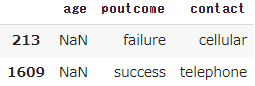

**問9**    
dfをコピーしたdf2を作成してください

In [ ]:
df2 = df.copy()

**問10**  
df2のage列の欠損値を、loc機能で穴埋めしてください。  
このとき、クロス集計した表の値を使い、poutcome列、contact列の値に対応する平均値で穴埋めしてください。


In [ ]:
# df2のage列が欠損値かどうかを示すシリーズを取得し、変数is_nullに代入する（欠損だとTrue)
is_null = df2['age'].isnull()

# df2の欠損値へ埋め込む(2箇所あります)
df2.loc[(df2['poutcome'] == 'failure') & (df2['contact'] == 'cellular') & (is_null), 'age'] = 40.338028

df2.loc[(df2['poutcome'] == 'success') & (df2['contact'] == 'telephone') & (is_null), 'age'] = 46.700000

**問11**  
df2の各列の欠損値の個数を表示してください。  

In [ ]:
df2.isnull().sum()

age               0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

▶実行結果  
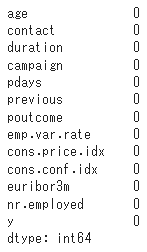

**問12**  
df2のcontact列、poutcome列をダミー変数化してください（ダミー変数化した先頭1列は削除するようにしてください）  
また、処理後の先頭5行を表示してください

In [1]:
# 2列をダミー変数化した結果を変数dummiedに代入する
# dummied = pd.get_dummies(df2[['contact', 'poutcome']], drop_first=True)
dummied = pd.get_dummies(df2[['contact', 'poutcome']], drop_first = 'poutcome')


# dummiedの先頭5行を表示する
dummied.head()

NameError: ignored

▶実行結果  
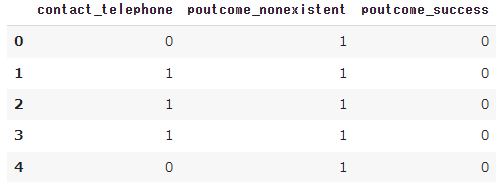

**問13**  
df2から以下の列を取り出して、変数Xに代入してください。  
また、変数Xの行数と列数を表示してください。  

取り出す列  
'age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'   



In [ ]:
# 特徴量を取り出す
X = df2.loc[:, ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

# 行数
print('行数={}'.format(X.shape[0]))

# 列数
print('列数={}'.format(X.shape[1]))

行数=4119
列数=10


▶実行結果  
行数 =  4119  
列数 =  10

**問14**  
df2から正解データを取り出して、変数yに代入してくください。  
また、変数yの行数を表示してください。

In [ ]:
# 特徴を取り出す
# y = df2['y']
y = df.loc[:, 'y']

# 行数
print('行数={}'.format(y.shape[0]))

行数=4119


▶実行結果  
行数 =  4119

**問15**  
Xに問12でダミー変数化した結果を横方向に連結してください。  
また、処理後の先頭5行を表示してください。

In [ ]:
# 変数Xに変数dummiedを横方向に連結した結果を、変数Xに再度代入してください
X = pd.concat( [X, dummied] , axis=1)

# Xの先頭5行を表示する
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_telephone,poutcome_nonexistent,poutcome_success
0,30.0,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,0
1,39.0,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,1,1,0
2,25.0,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,1,1,0
3,38.0,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,1,1,0
4,47.0,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,1,0


▶実行結果  
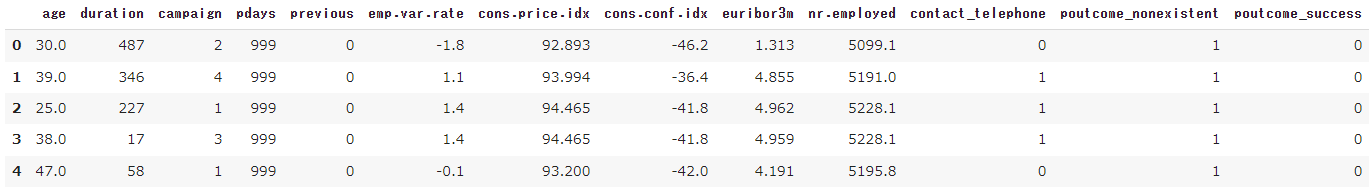

**問16**  
X、yを訓練データ、テストデータに分割してください。  
* テストデータに使用する割合を20%、乱数シードは0とする
* 訓練データの特徴量を格納する変数名はX_trainとする
* テストデータの特徴量を格納する変数名はX_testとする
* 訓練データの正解データを格納する変数名はy_trainとする
* テストデータの正解データを格納する変数名はy_testとする

またX_train、X_testの行数、列数を表示してください。

In [ ]:
# 分割する
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 0)


# X_trainの行数、列数を表示する
print('X_train:{}'.format(X_train.shape))

# X_testの行数、列数を表示する
print('X_test:{}'.format(X_test.shape))

X_train:(3295, 13)
X_test:(824, 13)


▶実行結果  
X_train: (3295, 13)  
X_test: (824, 13)

**問17**  
正解データの偏りを考慮した決定木モデルを作成し、訓練データを学習させてください。  
木の深さは5、乱数シードは0としてください。

In [ ]:
# 決定木のモデルを生成し、変数modelに代入する
model = tree.DecisionTreeClassifier(max_depth = 5, random_state = 0, class_weight='balanced')

# 訓練データを学習させる
model.fit(X_train, y_train)

# 正解率を表示する
print('訓練データでの正解率:{}'.format(model.score(X_train, y_train)))
print('テストデータでの正解率:{}'.format(model.score(X_test, y_test)))

訓練データでの正解率:0.9031866464339909
テストデータでの正解率:0.8434466019417476


▶実行結果  
訓練データでの正解率: 0.9031866464339909  
テストデータでの正解率: 0.8434466019417476

**問18**  
学習済みモデルの特徴量重要度を表示してください

In [ ]:
# 特徴量重要度のデータからデータフレームを作成し、インデックス名に 特徴量Xの列名 を指定する
pd.DataFrame(model.feature_importances_, index = X_train.columns)

,0
age,0.015041
duration,0.511683
campaign,0.002469
pdays,0.002069
previous,0.005175
emp.var.rate,0.000000
cons.price.idx,0.005537
cons.conf.idx,0.065523
euribor3m,0.073034
nr.employed,0.319470


▶実行結果  
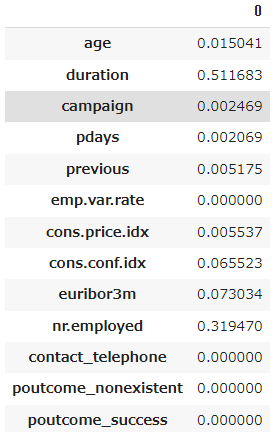

**問19**  
学習済みモデルを「chapter07_model.pkl」という名前で保存してください

In [ ]:
# pickleをインポート
import pickle

# modelを'survived.pkl'という名前で保存する
with open('chapter07_model.pkl', 'wb') as f:
    pickle.dump(model, f)